In [1]:
import pandas as pd
df = pd.read_pickle('ecommerce_data_cleaned.pkl')
print("cleaned data")
df.info()

cleaned data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            5000 non-null   int64         
 1   customer_age        5000 non-null   int64         
 2   customer_gender     5000 non-null   category      
 3   product_category    5000 non-null   object        
 4   payment_method      5000 non-null   category      
 5   order_value_usd     5000 non-null   float64       
 6   delivery_time_days  5000 non-null   int64         
 7   customer_rating     5000 non-null   float64       
 8   returned            5000 non-null   object        
 9   order_date          5000 non-null   datetime64[ns]
 10  returned_status     5000 non-null   int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 361.5+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# age group vs. return rate
age_bins = [18,30,40,50,60,70]
age_labels=['18-30', '31-40', '41-50','51-60','61-70']
df['age_group'] = pd.cut(df['customer_age'], bins=age_bins,labels=age_labels)

age_return_analysis = df.groupby('age_group')['returned_status'].mean() *100

plt.figure(figsize=(10,5))
sns.barplot(x=age_return_analysis.index, y=age_return_analysis.values, palette='magma')
plt.title('Return Rate by Age Group(%)', fontsize=14)
plt.ylabel('Return Rate (%)')
plt.show()

# gender buying

gender_spending = df.groupby(['customer_gender', 'product_category'])['order_value_usd'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=gender_spending, x='product_category', y='order_value_usd', hue='customer_gender')
plt.title('Spending Power: Gender vs. Product Category', fontsize=14)
plt.xticks(rotation=45)
plt.show()

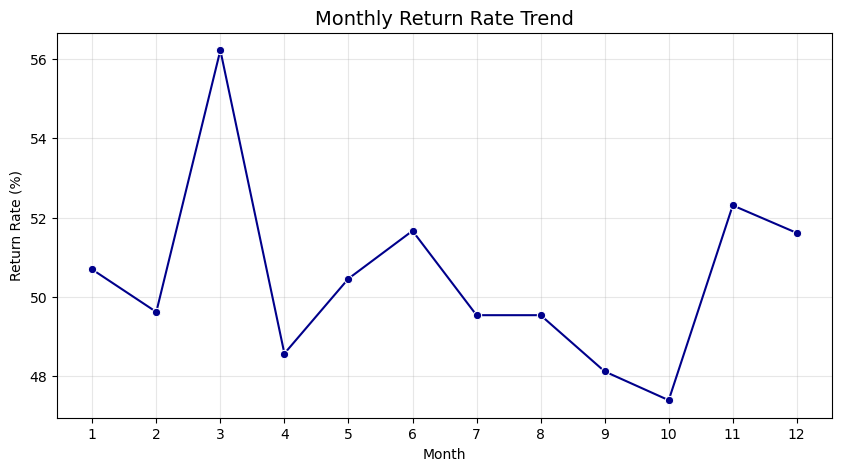

📊 Return Rate: Weekday vs. Weekend
is_weekend
Weekday    49.831933
Weekend    52.167832
Name: returned_status, dtype: float64


In [4]:
# --- monthly return ---
df['order_month'] = df['order_date'].dt.month
monthly_return = df.groupby('order_month')['returned_status'].mean() * 100

plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_return.index, y=monthly_return.values, marker='o', color='darkblue')
plt.title('Monthly Return Rate Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Return Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.show()

# --- 2.2 weekend, and weekly ---
df['is_weekend'] = df['order_date'].dt.dayofweek.isin([5, 6]).map({True: 'Weekend', False: 'Weekday'})
weekend_analysis = df.groupby('is_weekend')['returned_status'].mean() * 100

print("📊 Return Rate: Weekday vs. Weekend")
print(weekend_analysis)

/var/folders/pb/6bhlmzkx375g_t63x2_w3gnc0000gn/T/ipykernel_3021/2787712214.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=ax[1], x=weekend_beauty.index, y=weekend_beauty.values, palette='Reds_r')


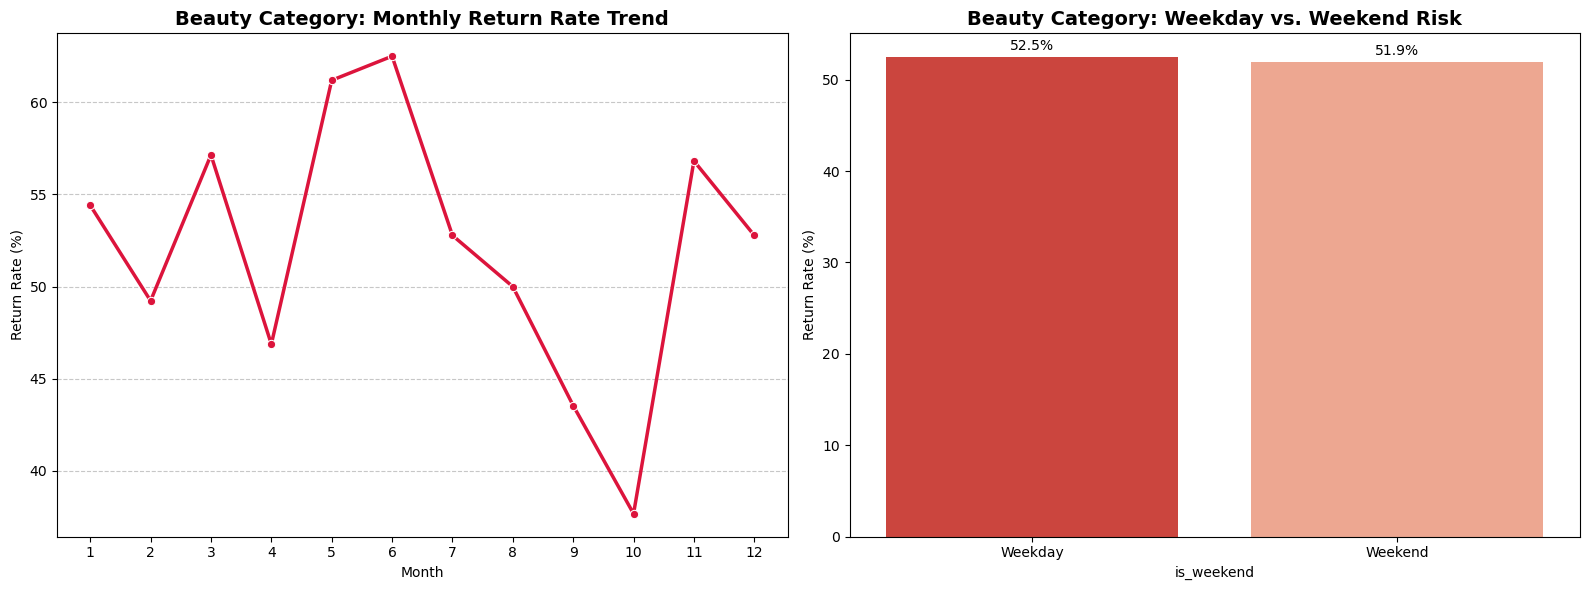

 Total Beauty Orders: 853
 Avg Return Rate for Beauty: 52.29%


In [5]:
# filter data
df_beauty = df[df['product_category'] == 'Beauty'].copy()

# Monthly Trend for beauty
monthly_beauty = df_beauty.groupby('order_month')['returned_status'].mean() *100

# weekend vs. weekday
weekend_beauty = df_beauty.groupby('is_weekend')['returned_status'].mean() *100

fig, ax = plt.subplots(1, 2, figsize=(16,6))
# Monthly
sns.lineplot(ax=ax[0], x=monthly_beauty.index, y=monthly_beauty.values, marker='o', color='crimson', linewidth=2.5)

ax[0].set_title('Beauty Category: Monthly Return Rate Trend', fontsize=14, fontweight='bold')
ax[0].set_ylabel('Return Rate (%)')
ax[0].set_xlabel('Month')
ax[0].set_xticks(range(1, 13))
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Weekend impact
sns.barplot(ax=ax[1], x=weekend_beauty.index, y=weekend_beauty.values, palette='Reds_r')
ax[1].set_title('Beauty Category: Weekday vs. Weekend Risk', fontsize=14, fontweight='bold')
ax[1].set_ylabel('Return Rate (%)')

# Add percentage labels
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

print(f" Total Beauty Orders: {len(df_beauty)}")
print(f" Avg Return Rate for Beauty: {df_beauty['returned_status'].mean()*100:.2f}%")